In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from wordpress_graph.paths import DATA_DIR
import feedparser
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from wordpress_graph.paths import DATA_DIR

In [4]:
G = nx.read_gpickle((DATA_DIR/"network_path.gpickle").as_posix())

### Generate layouts

In [6]:
spring_pos = nx.spring_layout(G, k=1/len(G.nodes())**.25)

In [7]:
kamada_kawai_pos = nx.drawing.layout.kamada_kawai_layout(G)

### Cluster communiities

In [8]:
import community
import seaborn as sns

In [9]:
partition = community.best_partition(G)
set(partition.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8}

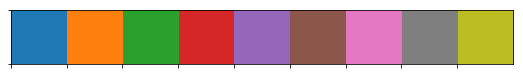

In [10]:
pal = sns.color_palette("tab10", n_colors=len(set(partition.values())))
sns.palplot(pal)

In [11]:
def set_axis_lims(ax, pos, nstd=2):
    pos_array = np.vstack(pos.values())
    pos_mean = np.mean(pos_array, axis=0)
    pos_std = np.std(pos_array, axis=0)

    ax.set_xlim([pos_mean[0] - pos_std[0] * 3, pos_mean[0] + pos_std[0] * 3])
    ax.set_ylim([pos_mean[1] - pos_std[1] * 3, pos_mean[1] + pos_std[1] * 3])

### Plot in networkx

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

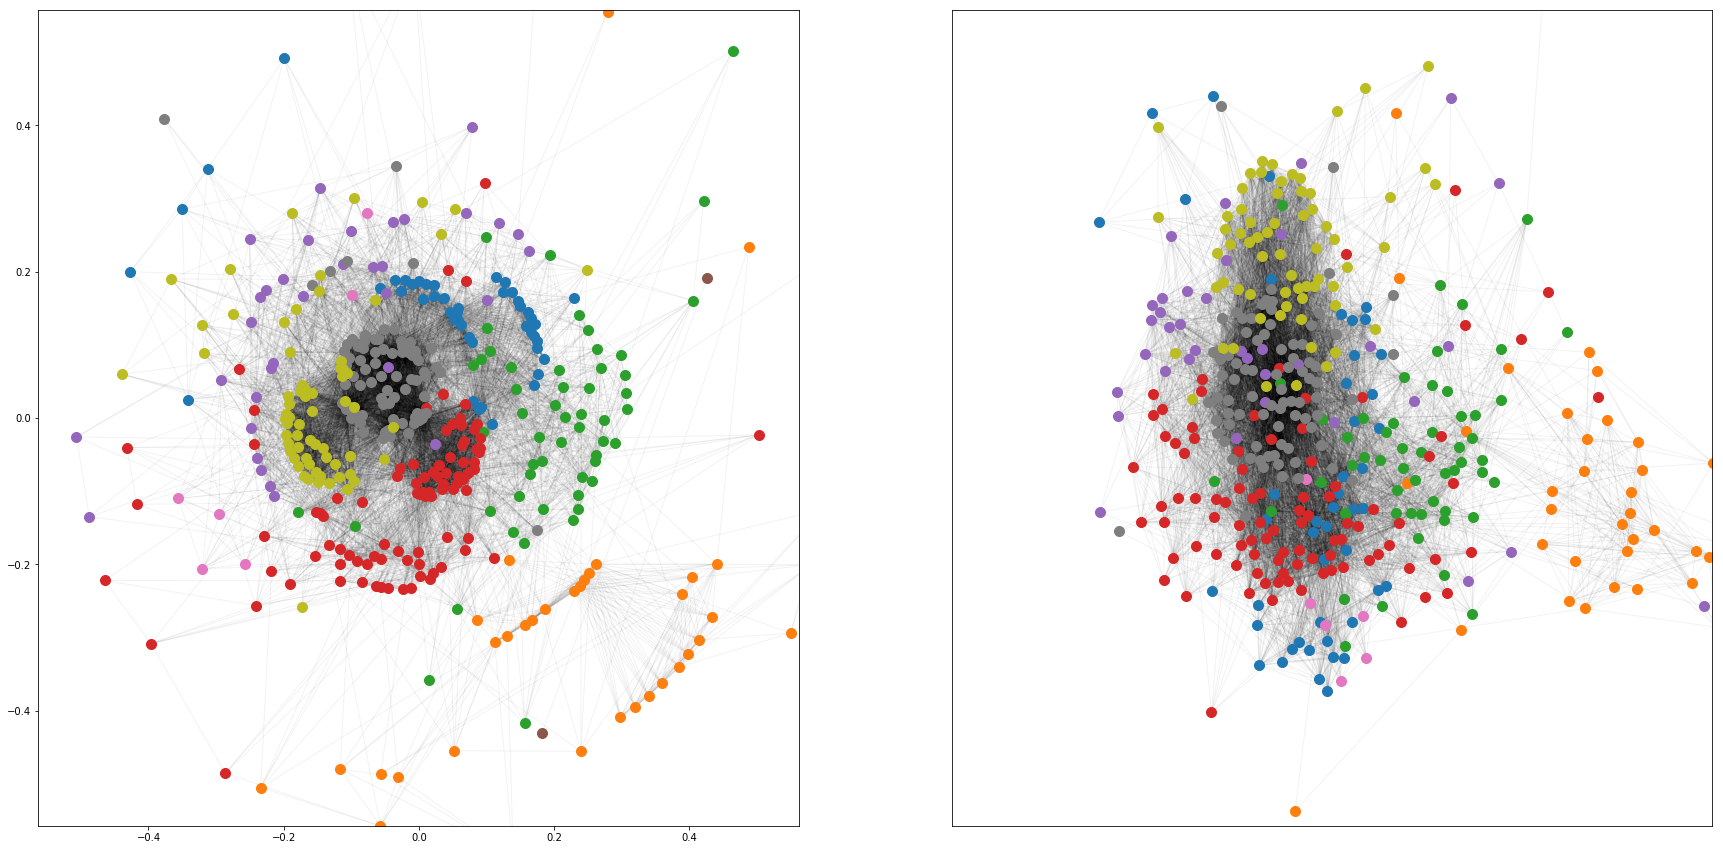

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))

for pos, ax in zip([kamada_kawai_pos, spring_pos], axs):
    for count, com in enumerate(set(partition.values())):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        nx.draw_networkx_nodes(
            G, pos, list_nodes, node_size=100, node_color=list(pal[count]), ax=ax
        )

    nx.draw_networkx_edges(G, pos, alpha=0.05, ax=ax)

    set_axis_lims(ax, pos, nstd=2)


### take a look at the communities

In [19]:

for count, com in enumerate(set(partition.values())):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    
    print(count)
    for node in list_nodes[:10]:
        print('\t' + node.replace('_', ' '))

0
	critical behavior from deep dynamics: a hidden dimension in natural language
	cognitive science in the era of artificial intelligence: a roadmap for reverse-engineering the infant language-learner
	how many syllables does english have?
	a role for the developing lexicon in phonetic category acquisition.
	phonological parsing in speech recognition
	statistical learning by 8-month old infants
	unsupervised segmentation of audio speech using the voting experts algorithm
	infants' preference for the predominant stress patterns of english words
	mechanisms and constraints in word segmentation.
	infants′ sensitivity to the sound patterns of native language words
1
	adversarially learned inference
	infogan: interpretable representation learning by information maximizing generative adversarial nets
	improved techniques for training gans
	auto-encoding variational bayes
	autoencoding beyond pixels using a learned similarity metric
	discriminative deep metric learning for face verification in